In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_data = pd.read_csv('titanic-data.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 问题提出：哪些变量会影响到生还率

## 这里查看columns中是否有缺省值，分别为多少

### 由以下结果可以看出数据一共有891行（即包含了891乘客的信息），12列
### 可以看出一共有三项column有缺省
### 分别是，Age，Cabin和Embarked
### Cabin这个缺省最多，达到了687,Age偏少，有177个，Embarked最少，只有2个缺省

In [4]:
# 查看titanic_data数据整体类型和缺省情况
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# 各个列元素缺省数量
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# 缺省占比
titanic_data.isnull().sum()/891.

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

# 单变量分析

### 这里我先不对PassengerId,Name，Ticket，Cabin进行处理
### 对剩余8个变量进行一个简单的了解
### 其中6个我们先用计数图来大致了解下数量情况
### 另外两个变量，Fare和Age变化范围较大，分别使用(带分布密度的)散点图，小提琴图

### 进行计数统计和占比计算

#### 计算生还人数与死亡人数及其各自占比

In [7]:
print titanic_data.Survived.value_counts()
print titanic_data.Survived.value_counts(normalize=True)

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


#### 计算男性女性人数及其各自占比

In [8]:
print titanic_data.Sex.value_counts()
print titanic_data.Sex.value_counts(normalize=True)

male      577
female    314
Name: Sex, dtype: int64
male      0.647587
female    0.352413
Name: Sex, dtype: float64


#### 计算不同Pclass人数与死亡人数及其各自占比

In [9]:
print titanic_data.Pclass.value_counts()
print titanic_data.Pclass.value_counts(normalize=True)

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


#### 计算各自出发地人数及其各自占比

In [10]:
print titanic_data.Embarked.value_counts()
print titanic_data.Embarked.value_counts(normalize=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


#### 计算SibSp人数及其各自占比

In [11]:
print titanic_data.SibSp.value_counts()
print titanic_data.SibSp.value_counts(normalize=True)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64


#### 计算Parch人数及其各自占比

In [12]:
print titanic_data.Parch.value_counts()
print titanic_data.Parch.value_counts(normalize=True)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64


#### 数据简要总览

In [13]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### 作图，前6个为计数，后面2个反应了分布情况

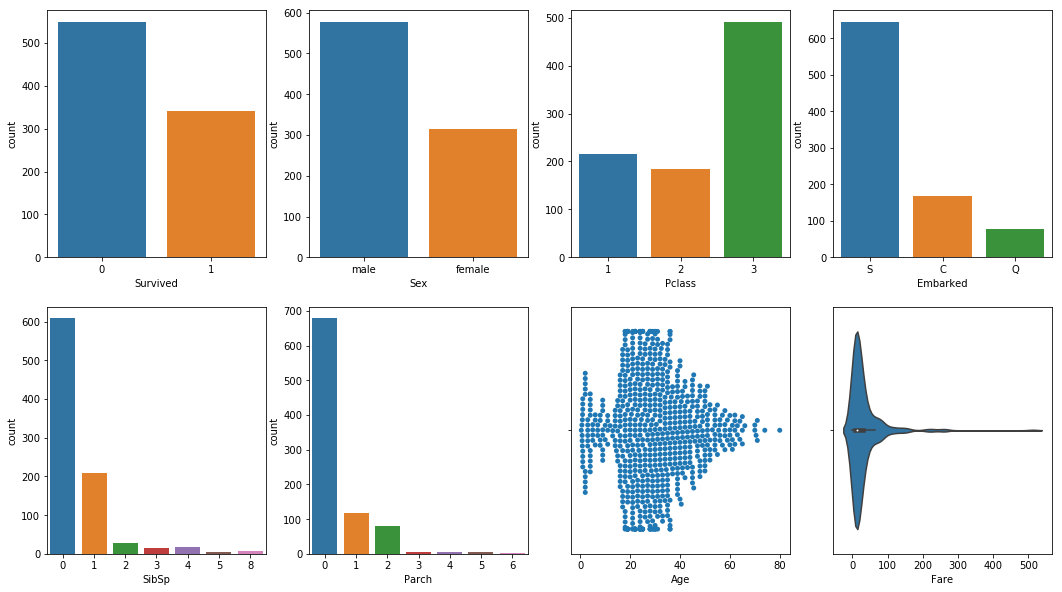

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10), sharex=False, sharey=False)

sns.countplot(x='Survived', data=titanic_data, ax=axes[0,0])
sns.countplot(x='Sex', data=titanic_data, ax=axes[0,1])
sns.countplot(x='Pclass', data=titanic_data, ax=axes[0,2])
sns.countplot(x='Embarked', data=titanic_data, ax=axes[0,3])
sns.countplot(x='SibSp', data=titanic_data, ax=axes[1,0])
sns.countplot(x='Parch', data=titanic_data, ax=axes[1,1])
# sns.distplot(titanic_data['Fare'], ax= axes[1,2])
sns.swarmplot(x=titanic_data["Age"],ax = axes[1,2])
# sns.distplot(titanic_data['Age'].dropna(), ax = axes [1,3])
sns.violinplot(x=titanic_data["Fare"],ax = axes[1,3])

## 结论(单变量分析)
#### 本表一共收录了891人的一些信息

#### 通过以上分析

#### 可以看出，幸存下来的人不到39%

#### 本表乘客中，男性居多，接近65%

#### Pclass中，第3等级人最多，占比达到了55.1%，第2等级和第1等级差别不是很大，分别占比20.7%，24.2%

#### 从出发地来看，在S（Southampton）登船的人最多，占比72.4%，其次是C（Cherbourg），占比18.9%，来自Q（Queenstown）的人最少，只有8.7%

#### 和自己同辈分的人中：这里指和自己结伴同行的人中，独自一人来乘坐泰坦尼克号的人士居多，达到了68.2%，有兄弟姐妹，丈夫妻子之一者，占比不到32%

#### 和自己不同辈分的人中：这里为父母小孩，这类人中，只身一人前往泰坦尼克号的达到了76.1%

#### 年龄分布，结合数据，可以看出，平均年纪为29.7岁，75%的人在38岁以内，50%的人位于20到38岁之间，青壮年居多

#### 票价方面，均价，32.2，75%的票价低于31，最高票价高达512.3292

In [16]:
titanic_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
titanic_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

# 多变量分析

### 这里我先借用热力图来观察titanic_data中任选两类数值的正负相关性

### 处理流程如下
#### 这里先来试求反映生还与否和Pclass，Age，Sex等变量之间的相关性
####  从上可以看出所给数据类型的一个分布情况，大致分为二类
####
####  数值类型：PassengerId，Survived，Pclass，Age，SibSp，Parch，Fare
####  object类型：Name，Sex，Ticket，Cabin，Embarked
####
####  因为需要研究的是生还与否的问题,首先考虑下哪些变量会影响生还
####  在我看来，Name，Ticket，Cabin与生还与否无太大关联，没有什么实际意义（这里我假设与生还无关）
####  故先去掉不适合表达变量之间的相关性的Name，Ticket，Cabin变量
####  另外，也去掉PassengerId，这个只是起一个表格行计数作用，与生还关系无关，也抹去
####
####  同时部分字符串应转为数字类型
####  但还存在一个问题，就是Sex和Embarked两变量都是字符（串）类型，
####  对于Sex，只有male和female两种，为了方便，分别记为1，2
####
####  Embarked只有Q，S，C三类，这里为了方便，转为数字，分别记为31，2，3
####  这里Embarked只有Q，S，C三类，之所以按照1，2，3标记，是因为，在后面，Embarked与Fare图中
####  我观察到了，票价均值中，高低排序为Q,S,C,为了顺应这个关系，我在这里给了这样的一个标记大小顺序
####  此处排序可以更改
####
####  Embarked（有两个是缺省的，可以人为去掉这两行）
####  最后数据总行数应为891-2 = 889
####
####  以上处理完后，生成一个新的DateFrame数据集，这里记为titanic_corr_off_null
####  再使用titanic_corr_off_null.corr来批量计算titanic_correlation中变量两两之间的相关性
####  最后再通过热力图来显示两两变量之间的相关性

In [18]:
177./891

0.19865319865319866

####  删除缺省行

### 这里可以直接使用dropna（）函数命令
### 但是我考虑到，我的目的是要计算8个变量两两之间的相关性，所以要确保者8个变量全部为数值类型
### 以下为待分析的8个变量
### urvived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked

### 观察发现，只有Sex和Embarked为非数值型

### 非数值类型转为数值类型
#### Sex比较好办，只有两类，记为1，2，或者2，1都行，因为要么正相关，要么负相关

#### 但是Embarked有三个，超过了两类，这三个分类，如果没有排好序，很可能相关性不那么明显。
#### 比如，C，Q，S，如果记为1，2，3正好与其他变量的相关性表现良好，
#### 那么如果，我打乱C，Q，S的顺序，分别记为1，3，2，那么这时候，相关性可能就不那么明显了
#### 所以这里我并未着重对Embarked与Survived作一个过多的解释说明，我认为乘客是否生跟该乘客在哪儿登船没有直接关系，可能也有，比如，某登船区为富人区，Pclass大多数为1级，但是这里，我假设没有直接关系

### 关于我未使用dropna（）函数的原因
### 1.只去除Embarked，保留了更多的数据，更利于分析的准确

#### 这里Age缺省了177个，而Embarked只缺省了2个，我只想去除Embarked，
#### 所以使用了查找Embarked这列元素，哪一行为缺省行，最终只去掉了2行

#### 而如果用了dropna（）函数，那么会去掉所有带有缺省值的行数，这里至少会去掉177行，最多去掉177+2=179行

#### 相当于去掉了原数据的20%（177./891 = 0.1986），其它6列数据中的元素也被（无辜）去掉了20%，我怕会对后面分析有影响
####
### 2.Age这一行的缺省可以不去

#### 因为后面是计算相关性，而dataframe.corr（）对于带有缺省的列也是可以计算的，且Age本来就是数值类型变量

### 所以我最终选择了只去掉Embarked两行数据，最终剩余数据行数891-2 = 889


In [19]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# 提取各列，存入titanic_corr_data
titanic_corr_data = titanic_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [21]:
# 发现titanic_corr_data中Sex和Embarked均为object类型，不便于计算相关性，需要在后面修改为int或者float类型
titanic_corr_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [22]:
# 找出Embarked所在列中元素缺省的行位置,存在null_point列表中
# 以下可以发现，位置在61行，和829行存在缺省
embarked_data = titanic_data.Embarked
emba_null = embarked_data.isnull()
null_point = []
for i in range(len(emba_null)):
    if emba_null[i] == True:
        null_point.append(i)
print null_point

[61, 829]


In [23]:
# 去掉缺省值所在行，数据行数剩余891-2 = 889
titanic_corr_off_null = titanic_corr_data.drop([61,829])
titanic_corr_off_null.shape

(889, 8)

#### 替换Sex和Embarked中的元素

In [24]:
# 将index重置为顺序数列（从0一直到888）
# 因为drop（）抹去了61行数据，同时抹去了该行的index，数据中index原本为60，61，62现在变成了，60，62，63
# titanic_corr_off_null.reset_index(drop = True,inplace=True)
# 最后发现这里可改可不改，故以上隐去

In [25]:
# 更改Embarked，Q','S','C'分别更改为3，2，1，2，3
# 更改Sex，'male','female',分别更改为1，2
# 这里为了方便把titanic_corr_off_null记为df
df = titanic_corr_off_null
df.Sex.replace(['female','male'],[2,1],inplace =True)
df.Embarked.replace(['C','S','Q'],[3,2,1],inplace =True)
titanic_corr_off_null.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,2,38.0,1,0,71.2833,3
2,1,3,2,26.0,0,0,7.9250,2


In [26]:
# 发现原来为object类型的Sex和Embarked也都变为int64类型了，这样就可以计算出titanic_corr_off_null中所有两者之间的相关性了
titanic_corr_off_null.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

#### 计算相关性

In [27]:
# 将Sex和Embarked两个变量的数据类型由object转为int，
# 这样后面使用df.corr，才能包含Sex和Embarked两个变量
# titanic_corr_off_null['Sex'] = titanic_corr_off_null['Sex'].astype('int64')
# titanic_corr_off_null['Embarked'] = titanic_corr_off_null['Embarked'].astype('int64')
# 上面已经完成，这里不需要再转类型了，故隐去

In [28]:
# 计算任意两个变量之间的相关性
titanic_corr = titanic_corr_off_null.corr()
titanic_corr 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,0.541585,-0.082446,-0.034040,0.083151,0.255290,0.126753
Pclass,-0.335549,1.000000,-0.127741,-0.365902,0.081656,0.016824,-0.548193,-0.307324
Sex,0.541585,-0.127741,1.000000,-0.099037,0.116348,0.247508,0.179958,0.023175
Age,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,0.042340
SibSp,-0.034040,0.081656,0.116348,-0.307351,1.000000,0.414542,0.160887,-0.031095
Parch,0.083151,0.016824,0.247508,-0.187896,0.414542,1.000000,0.217532,0.035756
Fare,0.255290,-0.548193,0.179958,0.093143,0.160887,0.217532,1.000000,0.269588
Embarked,0.126753,-0.307324,0.023175,0.042340,-0.031095,0.035756,0.269588,1.000000


#### 使用热力图表示相关性

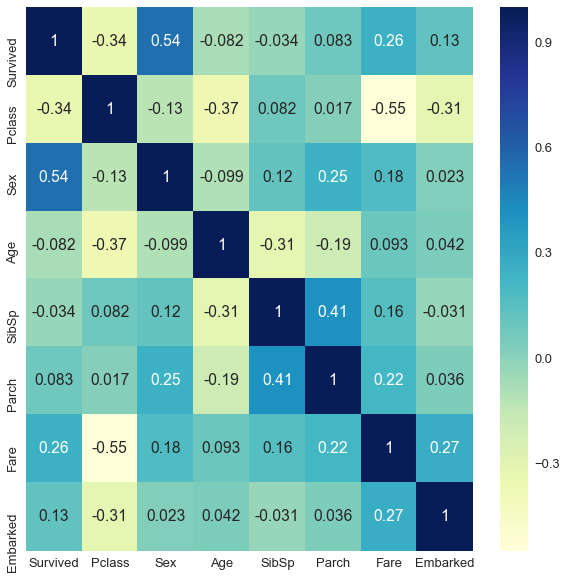

In [35]:
# 字体大小设置
sns.set(font_scale=1.3)
# 图像区域大小
fig = plt.figure(figsize=(10, 10)) 
# 显示titanic_corr2的热力图
# annot=True是为了在每个小方块中注明对应的（相关性）数值
sns.heatmap(titanic_corr,annot=True,cmap='YlGnBu');

## 结论(多变量分析)
### 这里我们使用相关性来做一个大致判断，相关性的标准（以下为一个绝对值范围）,暂定如下
#### 0.5-1.0，强相关
#### 0.3-0.5，中等相关
#### 0.1-0.3，弱相关
#### 0-0.1，无相关性
###
###
### 这里我们根据问题，关注Survived的相关性，这里取前三相关性（绝对值）较大者来分析，分别是，Sex，Pclass和Fare
### 并结合电影《泰坦尼克号》来猜度解释，可能并不严谨，但我是想提供一个看待这个问题的角度
###
###
### 1.Sex与Survived
### 观察发现，Sex与Survived的相关性高达0.54，根据以上暂定规则，处于强相关范围，
### 也就是说，女性更容易生还，我想这可能是因为，这与当时人们的妇女优先意识有关，也就是说妇女先上救生艇，所以生还几率更大。
###
###
### 2.Pclass与Survived
### 其次就是Pclass，与Survived的相关性达到了-0.34，（注意，Pclass等级越高，值是越小的），也就是说，乘客的 社会地位等级越高（这里我理解为权贵阶级）， 那么生还几率会越大
### 结合电影，权贵阶级，所住船舱等级较高，也就是位于船体上层，而泰坦尼克号船体在撞击冰山后，缓缓下沉的过程中，会首先淹没船体下层
### 也就是说，位于船体下层的人（Pclass值较大者），逃生时间要比位于船体上层的人（Pclass值较小者）少
### 按照常理，逃生时间多一些，那么生还的几率也就大一些
### 还有种解释，就是，权贵阶级，在危难时刻，进入救生艇前，使用金钱来买通便利，抢先进入救生艇，而其他并不富裕阶层，则无法获取便利
### 
### 
### 3.Fare与Survived
### 再者就是Fare，与Survived相关性的相关性为0.26，处于弱相关范围，注意到，Fare与Pclass之间的相关性达到#-0.55，
### 可以说Fare在某种程度上反应了乘客的Pclass，Pclass可以说等级越高，大部分所住船舱等级也越高，那么自然Fare也越高，从而Fare与生还率之间就有一个正相关关系
### 即，Fare越高，生还几率越大
### 这里在我看来也是间接反应了Pclass等级越高，生还几率越大这样的一个关系

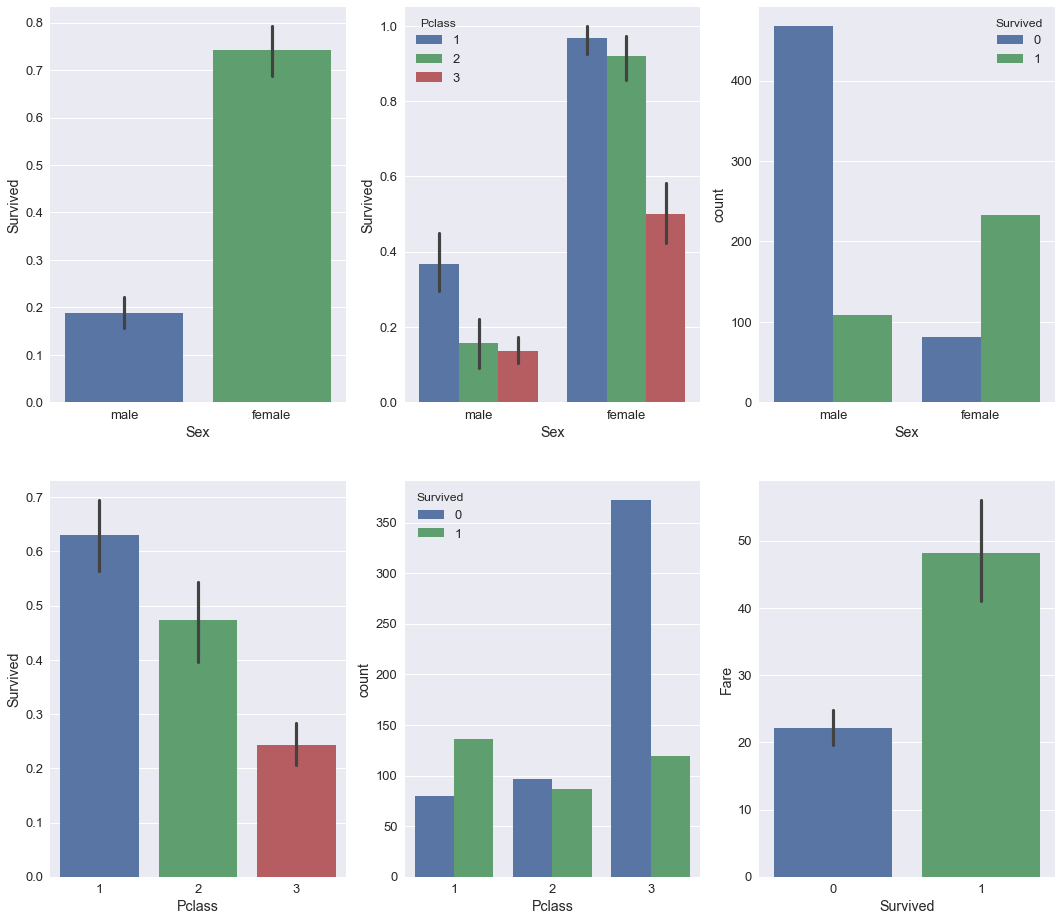

In [30]:
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 16), sharex=False, sharey=False)
sns.barplot(x='Sex',y="Survived", data=titanic_data, ax = axes2 [0,0])
sns.barplot(x='Sex', y="Survived", hue ="Pclass", data=titanic_data ,ax=axes2[0,1])
sns.countplot(x='Sex',hue="Survived", data=titanic_data, ax = axes2 [0,2])
sns.barplot(x="Pclass", y="Survived", data=titanic_data, ax=axes2[1,0])
sns.countplot(x='Pclass',hue="Survived", data=titanic_data, ax = axes2 [1,1])
sns.barplot(x="Survived", y="Fare", data=titanic_corr_off_null, ax = axes2 [1,2])

# 结论

### 通过热力图，可以看出最能影响生还的是Sex，其次是Pclass，最后是Fare
### 共有891行数据,在计算相关性的时候，我使用了889行，但是可能方法上有些细节没考虑周全，这也会影响到判断结果

## 存在的限制
### 1.我这里用的是一个相关性来推测生还，因果是无法判断的
### 2.这里并没有从统计上分析得出这些结果的偶然性，所以并不知道这里的结果是真正的差异造成的还是噪音造成的。
### 3.另外，Embarked为数据类型为boject，有三个取值，分别为，C，Q，S，超过了两类，这三个分类，如果没有排好序，很可能会使得Embarked与其余变量的相关性不那么明显。

## 影响生还的其他因素
### 1.救生艇，救生衣的数量
### 2.身体状况
### 3.求生意志（正如《泰坦尼克号》里面的女主一样，当然这些也不太好量化）

# 相关参考
## https://www.kaggle.com/c/titanic/data
## http://blog.csdn.net/u013082989/article/details/73278458
## http://blog.csdn.net/suzyu12345/article/details/69029106
## http://youerning.blog.51cto.com/10513771/1711371
## http://www.360doc.com/content/16/0226/21/20041187_537634722.shtml

In [31]:
titanic_data.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [32]:
survived_passenger_df=titanic_data[titanic_data.Survived==1]

In [33]:
survived_passenger_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
